<h1>Data</h1>

<h2>coordinates</h2>
The purpose of this module is to randomly provide a sample of points from a grid.

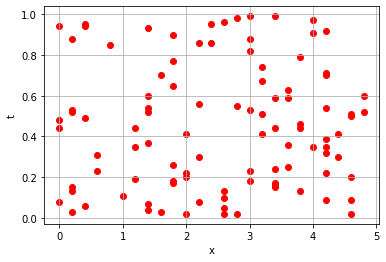

In [77]:
from direct_problem import Grid
from data import Coordinates

import matplotlib.pyplot as plt

grid = Grid(
    x_min=0,
    x_max=5,
    delta_x=0.2,
    t_max=1,
    delta_t=0.01
)

coordinates = Coordinates(grid)
sample_size = 100

x, t = coordinates.get_random_coordinates(sample_size)

def show(x, t):
    plt.scatter(x, t, c='r')
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("t")

show(x, t)

<h2>parameters</h2>
This module provide a set of random paramters alpha, beta, a and b. Parameters_size represent the number of problems that will be solved to generate the data.

In [78]:
from data import RandomParameters


parameters_size = 500
parameters = RandomParameters(
    parameters_size=parameters_size)

parameters 

      alpha      beta         a         b
0  0.362108  0.057879  1.545971  0.686713
1  0.019561  0.270165  2.032862  0.016528
2  0.555295  0.308982  0.421869  2.672052
3  0.885981  0.478934  1.215669  1.630420
4  0.295126  0.419490  0.795152  0.694765

<h2>data_generator</h2>
Generate the dataset from the sampled grid and the parameters. 

In [79]:
import numpy as np

from data import DataGenerator


f = lambda x: np.maximum(2-x, 0)

data_generator = DataGenerator(coordinates, parameters, solution_at_t_equal_zero=f)

# Provide raw solutions
raw_solution = data_generator.generate_data()


0.362107699201069 0.057879392918899764 1.5459705563213004 0.6867127860284057


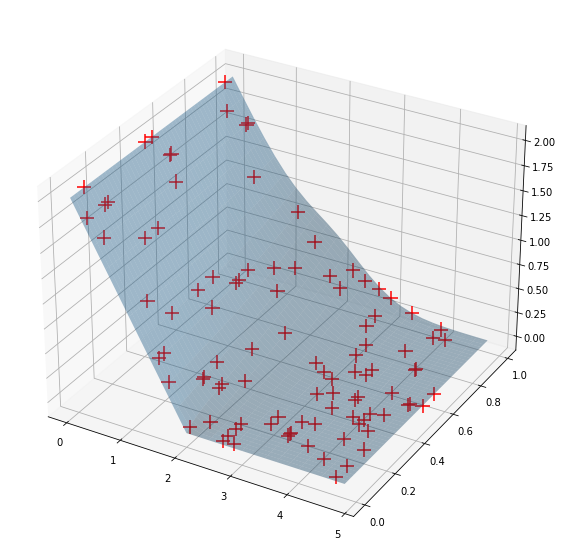

In [80]:
# Here is an illustration of what one item of input data looks like:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
T, X = np.meshgrid(x, t)
ax.scatter(x, t, raw_solution[0], c="r", marker="+", s=200, alpha=1)

# We solve the problem with set of parameters so we can see our data input
# next to the real solution
from direct_problem import ToyProblem, CSFTSolver
alpha, beta, a, b = parameters.parameters_array[0]
print(alpha, beta, a, b)
problem = ToyProblem(alpha, beta, a, b, f)
problem.set_grid(grid)
problem.init_boundaries()

solver = CSFTSolver(problem)
u = solver.solve()[0]

X, T = grid.meshed_grid()

ax.plot_surface(X, T, u, alpha=0.4)





For training purpose, we'll ask pytorch to provide this raw data as a dataloader

In [81]:
# Provide a DataLoader object
train_dl, test_dl = data_generator.dataloader(batch_size=50)